In [2]:
import pandas as pd
import os

# Setup folders and paths
# Folder names
# Assuming the current folder is the scripts folder which is
# one level deep from the parent, project folder.
current_directory = os.getcwd()
project_path = os.path.dirname(current_directory)

raw_data_folder = "rawdata"  # folder name where all the raw csv files reside
output_folder = "profiling_reports"  # folder name where all the profile reports will reside

# Paths
raw_path = os.path.join(project_path, raw_data_folder)
profile_report_path = os.path.join(project_path, output_folder)
# print(f"Raw Path: {raw_path}")
# print(f"Profile Path: {profile_report_path}")

# Create the output folder if it doesn't exist
os.makedirs(profile_report_path, exist_ok=True)

main_table = os.path.join(raw_path, "PBJ_Daily_Nurse_Staffing_Q2_2024.csv")
print(f"main_table: {main_table}")


main_table: /Users/richardkindle/Library/CloudStorage/GoogleDrive-eldnikr@gmail.com/My Drive/DE Academy/Projects/Healthcare/rawdata/PBJ_Daily_Nurse_Staffing_Q2_2024.csv


In [5]:
# df_main = pd.read_csv(main_table)
df_main = pd.read_csv(main_table, encoding='ISO-8859-1', low_memory=False)
# df_main = pd.read_csv(main_table, encoding='cp1252', low_memory=False)

# Dimensions and schema
print(df_main.shape)
print(df_main.dtypes)

# Basic preview
print(df_main.head())

# Summary stats
print(df_main.describe(include='all').T.to_string())

(1325324, 33)
PROVNUM              object
PROVNAME             object
CITY                 object
STATE                object
COUNTY_NAME          object
COUNTY_FIPS           int64
CY_Qtr               object
WorkDate              int64
MDScensus             int64
Hrs_RNDON           float64
Hrs_RNDON_emp       float64
Hrs_RNDON_ctr       float64
Hrs_RNadmin         float64
Hrs_RNadmin_emp     float64
Hrs_RNadmin_ctr     float64
Hrs_RN              float64
Hrs_RN_emp          float64
Hrs_RN_ctr          float64
Hrs_LPNadmin        float64
Hrs_LPNadmin_emp    float64
Hrs_LPNadmin_ctr    float64
Hrs_LPN             float64
Hrs_LPN_emp         float64
Hrs_LPN_ctr         float64
Hrs_CNA             float64
Hrs_CNA_emp         float64
Hrs_CNA_ctr         float64
Hrs_NAtrn           float64
Hrs_NAtrn_emp       float64
Hrs_NAtrn_ctr       float64
Hrs_MedAide         float64
Hrs_MedAide_emp     float64
Hrs_MedAide_ctr     float64
dtype: object
  PROVNUM                  PROVNAME          CIT

                  Missing Count  Percent
PROVNUM                       0      0.0
PROVNAME                      0      0.0
CITY                          0      0.0
STATE                         0      0.0
COUNTY_NAME                   0      0.0
COUNTY_FIPS                   0      0.0
CY_Qtr                        0      0.0
WorkDate                      0      0.0
MDScensus                     0      0.0
Hrs_RNDON                     0      0.0
Hrs_RNDON_emp                 0      0.0
Hrs_RNDON_ctr                 0      0.0
Hrs_RNadmin                   0      0.0
Hrs_RNadmin_emp               0      0.0
Hrs_RNadmin_ctr               0      0.0
Hrs_RN                        0      0.0
Hrs_RN_emp                    0      0.0
Hrs_RN_ctr                    0      0.0
Hrs_LPNadmin                  0      0.0
Hrs_LPNadmin_emp              0      0.0
Hrs_LPNadmin_ctr              0      0.0
Hrs_LPN                       0      0.0
Hrs_LPN_emp                   0      0.0
Hrs_LPN_ctr     

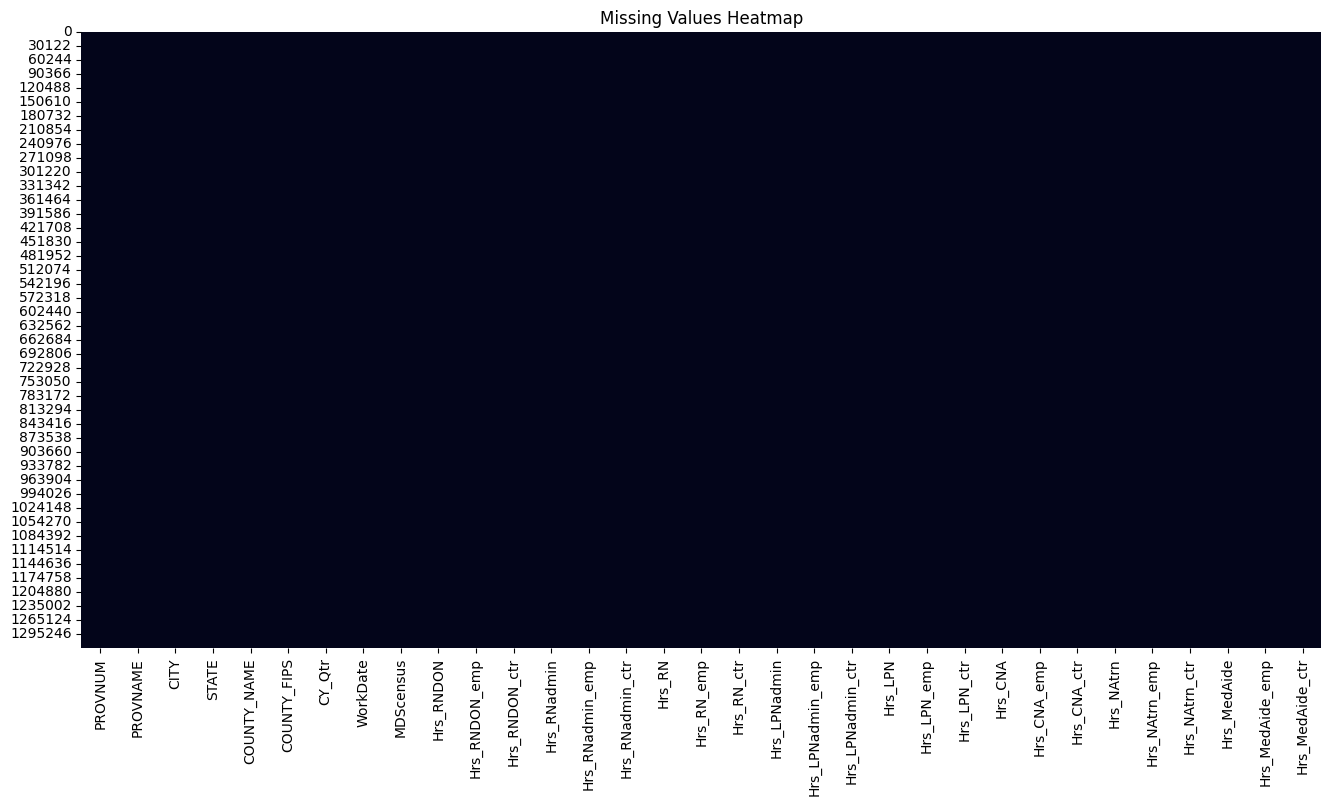

Duplicate rows: 0


In [4]:
# Missing values count
missing = df_main.isnull().sum()
missing_percent = (missing / len(df_main)) * 100
missing_report = pd.DataFrame({'Missing Count': missing, 'Percent': missing_percent})
print(missing_report.sort_values(by='Missing Count', ascending=False))

# Visual heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,8))
sns.heatmap(df_main.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

# Duplicates
duplicate_count = df_main.duplicated().sum()
print(f"Duplicate rows: {duplicate_count}")


In [ ]:
import numpy as np

numeric_cols = [
    'Hrs_RN', 'Hrs_LPN', 'Hrs_CNA', 'Hrs_MedAide', 'MDScensus'
]

# Boxplots
df_main[numeric_cols].boxplot(figsize=(12, 6), rot=45)
plt.title("Outlier Detection - Key Staffing Columns")
plt.show()

# You can also flag outliers using z-score or IQR method if needed
